Ce code implémente le calcul des déformées et fréquences propres pour une plaque encastrée (c'est une approximation). Il se base sur le livre "Vibration of Plates (Leissa, NASA SP-160)".

Attention, la syntaxe choisi dans ce livre pour dénommé l'indice des modes est la suivante : on dit que le mode 2 correspond au mode où l'on a 2 noeuds, soit le "premier" pour une plaque encastrée.

**Ainsi, le mode (2,2) de la plaque correspond à son premier mode**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = (12,4)

On commence par définir une plaque proprement

In [2]:
## Paramètres physique
h = 2.8e-3 #Epaisseur de  la plaque (m)
nu = 0.2 #Coeff de poisson (Pa)
E = 210e9 #Module de Young (Pa)
rho = 400 #Masse volumique (kg/m3)
D = E*h**3/(12*(1-nu**2)) #Raideur de la plaque
eta = 0.02 #Amortissement interne à la plaque
Lx, Ly, Lz = (40)*1e-2, (25.9)*1e-2, h #Dimensions (m)

## Paramètres de discrétisation
Nmx = 8
Nmy = 8

Nx = 100
Ny = 100

dx = 1e-3 #(10mm)
dy = 1e-3 #(10mm)
x = np.arange(0,Lx,dx)
y = np.arange(0,Ly,dy)
Nx = len(x)
Ny = len(y)

# Sur X

## Modes pairs

### Premier test de détermination des zéros

In [3]:
#Calcul de gamma : pour les modes pairs

from scipy import optimize
def gamma1_func(g1) :
    return np.tan(g1/2) + np.tanh(g1/2)

sol = optimize.root(gamma1_func, np.linspace(0,20,500), tol=2e-4)

In [4]:
sol = sol.x
sol = np.sort(sol)
tol = 1e-5
idx_to_delete = []
i = 0
while i < len(sol) :
    j = 0
    while i+j < len(sol) and np.abs(sol[i+j]-sol[i]) < tol  : #tant que les valeurs sont très proches
        if j != 0 :
            idx_to_delete.append(i+j)
        j += 1
    i += j
    
idx_to_delete = np.array(idx_to_delete)
new_sol = sol.copy()
new_sol = np.delete(new_sol, idx_to_delete)

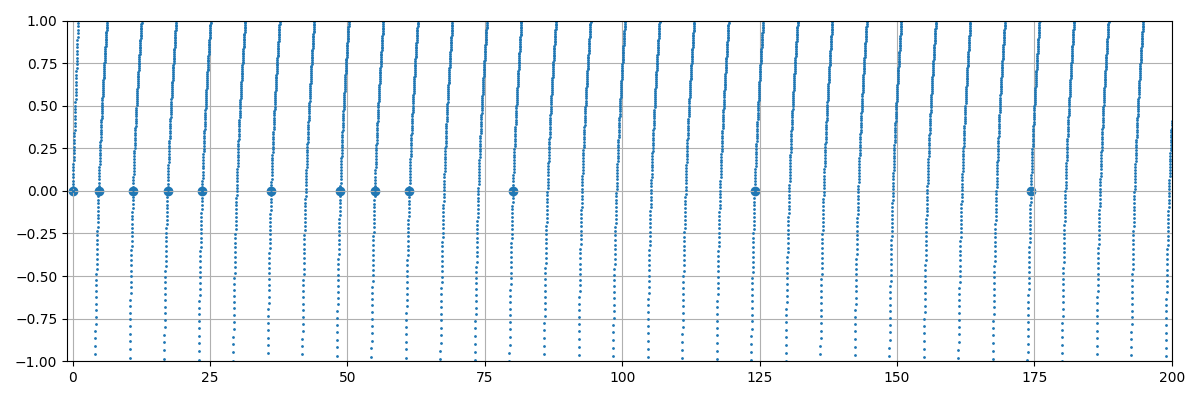

In [5]:
xg = np.linspace(0,200,10000)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(xg,gamma1_func(xg),label="", ls="", marker="o", markersize=1)
# ax1.scatter(np.unique(sol.xg), np.zeros(len(np.unique(sol.xg))))
ax1.scatter(new_sol, np.zeros(len(new_sol)))
ax1.grid()
#ax1.legend()
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title(r"")
ax1.set_xlim(-1,200)
ax1.set_ylim(-1,1)

fig.tight_layout()

plt.show()

On remarque graphiquement que l'on a une certaine régularité dans l'apparition des zéros. On va s'en servir pour mieux définir les points de départs de la recherche de racine

In [6]:
new_sol_pos = new_sol[new_sol>-1]
for j in range(len(new_sol_pos)-1) :
    print(np.abs(new_sol_pos[j]-new_sol_pos[j+1]))

4.730040744857734
6.265567093143937
6.283151570783279
6.283185493255505
12.566370845135406
12.566370383465937
6.283185307179586
6.283185307179586
18.84955592153875
43.98229715025711
50.26548245743669
56.54872733865798
1740.442270514704


### Amélioration de la recherche de zéro

In [7]:
x0 = [4.73 + 6.28*i for i in range(Nmx//2)] #Par analyse
x0 = np.array(x0)

In [8]:
#Calcul de gamma : pour les modes pairs

from scipy import optimize
def gamma1_func(g1) :
    return np.tan(g1/2) + np.tanh(g1/2)

sol = optimize.root(gamma1_func, x0, tol=2e-4)

def unique_with_tol(array, tol) :
    """
    Ce code permet de supprimer des doublons avec une certaine tolérance sur la distance entre les 2 élements définis égaux.
    
    # Inputs
    - array : arrayLike, trié de préférence
    - tol : tolérance définissant l'égalité entre deux éléments. Deux élements sont considéré comme doublons si ils sont égaux à la tolérance près.

    # Ouput

    - sorted_unique_array : arrayLike, tableau dans lequel on a supprimé les doublons. Attention ce tableau est trié par ordre croissant des valeurs.
    """

    array = np.sort(array)
    idx_to_delete = []
    i = 0
    while i < len(array) :
        j = 0
        while i+j < len(array) and np.abs(array[i+j]-array[i]) < tol  : #tant que les valeurs sont très proches
            if j != 0 :
                idx_to_delete.append(i+j)
            j += 1
        i += j

    array_unique = array.copy()
    if len(idx_to_delete)!=0 : #Si il existe des doublons...
        idx_to_delete = np.array(idx_to_delete)
        array_unique = np.delete(array_unique, idx_to_delete)
    else :
        print("Pas de doublons selon cette tolérance")
    return array_unique

new_sol = sol.x

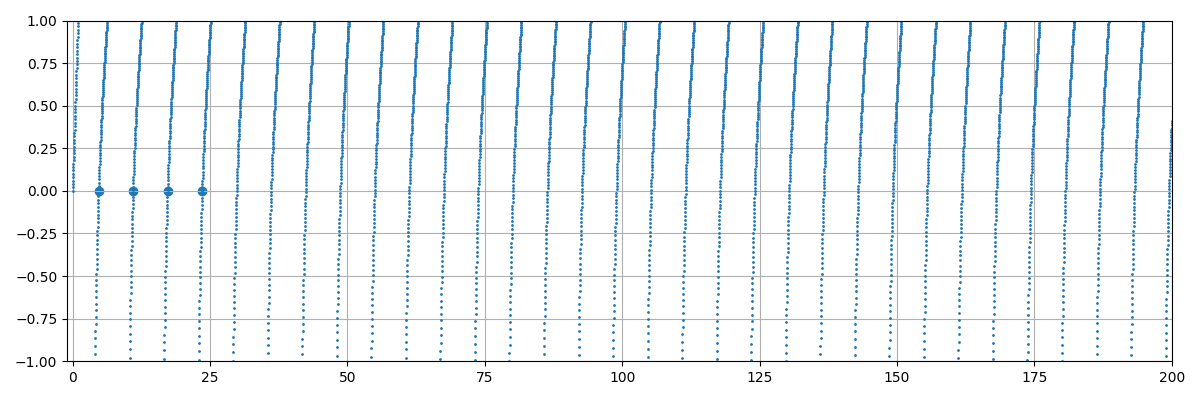

In [9]:
xg = np.linspace(0,200,10000)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(xg,gamma1_func(xg),label="", ls="", marker="o", markersize=1)
# ax1.scatter(np.unique(sol.xg), np.zeros(len(np.unique(sol.xg))))
ax1.scatter(new_sol, np.zeros(len(new_sol)))
ax1.grid()
#ax1.legend()
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title(r"")
ax1.set_xlim(-1,200)
ax1.set_ylim(-1,1)

fig.tight_layout()

plt.show()

Voici donc les valeurs de gamma 1

In [10]:
g1 = new_sol[new_sol>1e-9]
g1

array([ 4.73004074, 10.99560868, 17.27875998, 23.56194496])

4


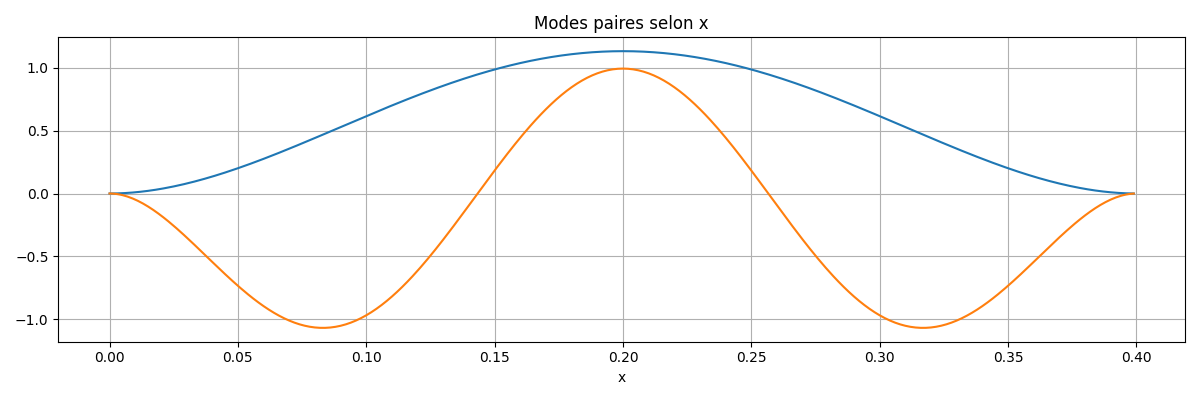

In [11]:
Nmx_pair = len(g1)
print(Nmx_pair)
X_pair_Nx_Nmx = np.cos(g1[np.newaxis,:]*(x[:,np.newaxis]/Lx - 1/2)) + np.sin(g1[np.newaxis,:]/2)/np.sinh(g1[np.newaxis,:]/2)*np.cosh(g1[np.newaxis,:]*(x[:,np.newaxis]/Lx - 1/2))

fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(2):
    ax1.plot(x,X_pair_Nx_Nmx[:,i],label="")
ax1.grid()
#ax1.legend()
ax1.set_xlabel("x")
ax1.set_ylabel("")
ax1.set_title(r"Modes paires selon x")
ax1.set_xlim()
ax1.set_ylim()

fig.tight_layout()

plt.show()

## Modes impairs

In [12]:
def gamma2_func(g2) :
    return np.tan(g2/2) - np.tanh(g2/2)

solg2 = optimize.root(gamma2_func, np.linspace(0,20,500))

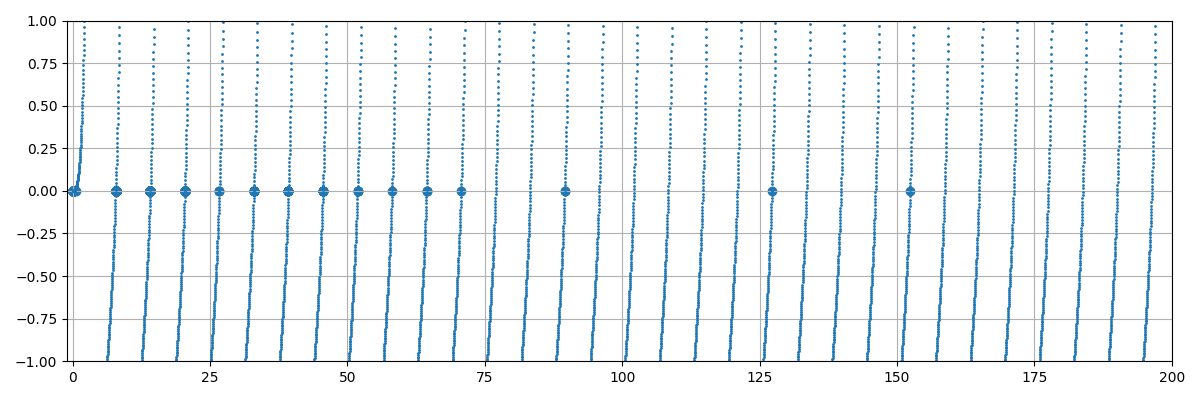

In [13]:
xg = np.linspace(0,200,10000)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(xg,gamma2_func(xg),label="", ls="", marker="o", markersize=1)
ax1.scatter(solg2.x, np.zeros(len(solg2.x)))
ax1.grid()
#ax1.legend()
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title(r"")
ax1.set_xlim(-1,200)
ax1.set_ylim(-1,1)

fig.tight_layout()

plt.show()

Idem, on remarque une certaine régularité, observons l'écart pour aider la recherche de racine

In [14]:
solg2_unique = unique_with_tol(solg2.x, 1e-1)

solg2 = solg2_unique[solg2_unique>0]
# print(solg2)

for j in range(len(solg2)-1) :
    print(np.abs(solg2[j]-solg2[j+1]))

0.37566994760738726
7.301427826204981
6.284178818117254
6.271984260219705
6.294399570579003
6.283098527795399
6.283150937008465
6.283230492182838
6.283261268289003
6.2831853087339695
6.283011943394705
6.283358672863102
18.849555919758984
37.69901022868788
25.132842844887776
1683.8936623241038
3455.7518201151706
11435.397357900478


Remarque : même écart ~6.28, mais part de 7.83

### Amélioration de la recherche des zéros

In [15]:
x02 = [7.83 + 6.28*i for i in range(Nmx//2)] #Par analyse 
x02 = np.array(x02)

solg2 = optimize.root(gamma2_func, x02)

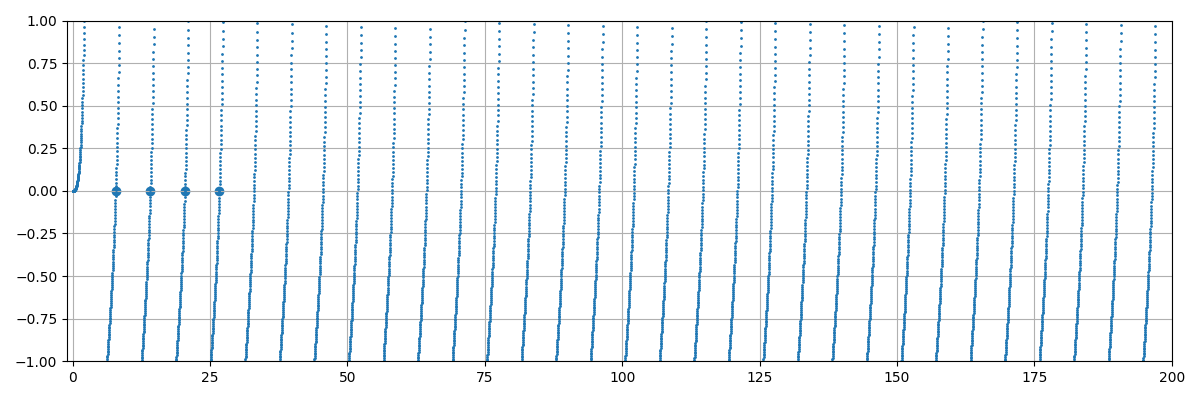

In [16]:
xg = np.linspace(0,200,10000)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(xg,gamma2_func(xg),label="", ls="", marker="o", markersize=1)
ax1.scatter(solg2.x, np.zeros(len(solg2.x)))
ax1.grid()
#ax1.legend()
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title(r"")
ax1.set_xlim(-1,200)
ax1.set_ylim(-1,1)

fig.tight_layout()

plt.show()

Voici les gamma 2 :

In [17]:
g2 = solg2.x
g2 = g2[g2>1]
g2

array([ 7.85320463, 14.13716549, 20.42035225, 26.70353755])

4


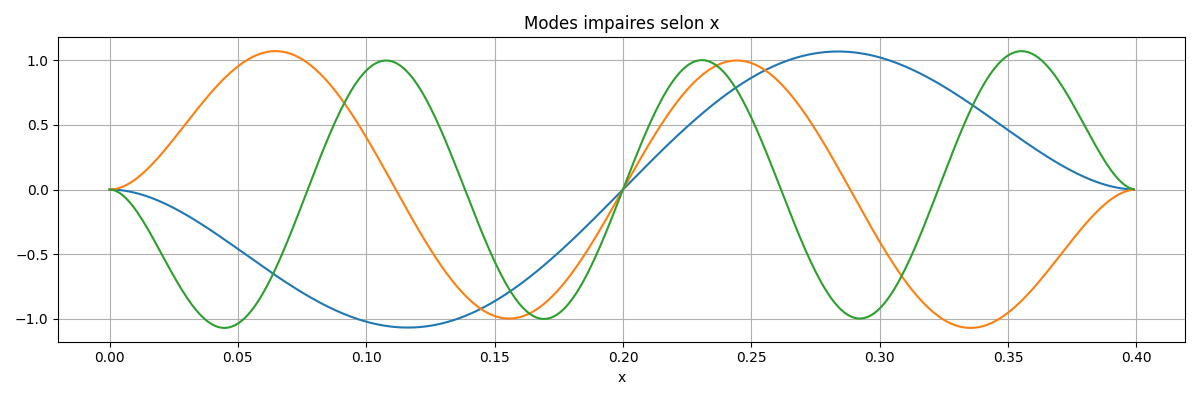

In [18]:
Nmx_impair = len(g2)
print(Nmx_impair)
X_impair_Nx_Nmx = np.sin(g2[np.newaxis,:]*(x[:,np.newaxis]/Lx - 1/2)) - np.sin(g2[np.newaxis,:]/2)/np.sinh(g2[np.newaxis,:]/2)*np.sinh(g2[np.newaxis,:]*(x[:,np.newaxis]/Lx - 1/2))

fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(3):
    ax1.plot(x,X_impair_Nx_Nmx[:,i],label="")
ax1.grid()
#ax1.legend()
ax1.set_xlabel("x")
ax1.set_ylabel("")
ax1.set_title(r"Modes impaires selon x")
ax1.set_xlim()
ax1.set_ylim()

fig.tight_layout()

plt.show()

Finalement :

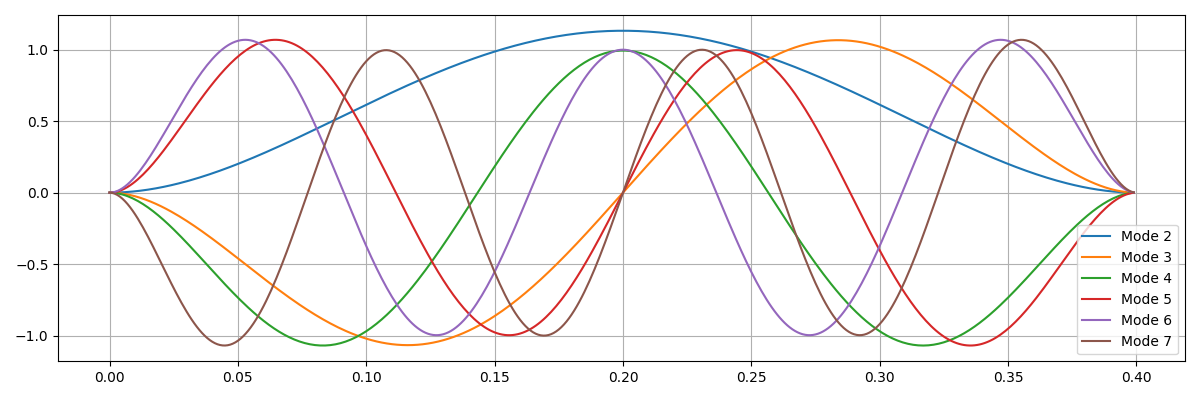

In [19]:
Nmx2 = Nmx_impair+Nmx_pair
if Nmx2 != Nmx :
    print("Attention, le nombre de mode en x est plus le même que prévu!")
    Nmx = Nmx2

X_Nx_Nmx = np.zeros((Nx,Nmx))

X_Nx_Nmx[:,0] = X_pair_Nx_Nmx[:,0]
for i in range(1,Nmx) :
    if i % 2 == 0 :
        X_Nx_Nmx[:,i] = X_pair_Nx_Nmx[:,i//2]
    else :
        X_Nx_Nmx[:,i] = X_impair_Nx_Nmx[:,i//2]

fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(6) :
    ax1.plot(x,X_Nx_Nmx[:,i],label=f"Mode {i+2}")
ax1.grid()
ax1.legend()
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title(r"")
ax1.set_xlim()
ax1.set_ylim()

fig.tight_layout()

plt.show()

# Modes selon Y

tout pareil en remplacant x par y, a par b

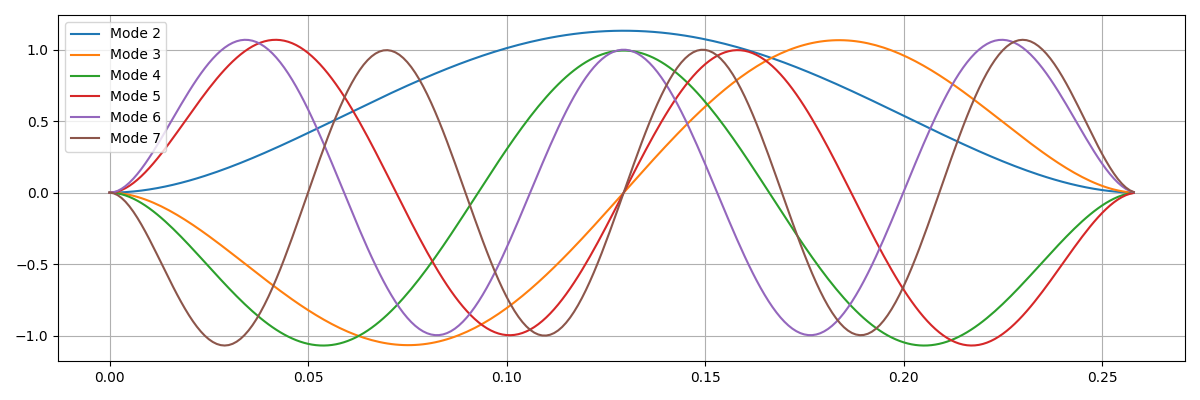

In [20]:
Y_pair_Ny_Nmy = np.cos(g1[np.newaxis,:]*(y[:,np.newaxis]/Ly - 1/2)) + np.sin(g1[np.newaxis,:]/2)/np.sinh(g1[np.newaxis,:]/2)*np.cosh(g1[np.newaxis,:]*(y[:,np.newaxis]/Ly - 1/2))
Y_impair_Ny_Nmy = np.sin(g2[np.newaxis,:]*(y[:,np.newaxis]/Ly - 1/2)) - np.sin(g2[np.newaxis,:]/2)/np.sinh(g2[np.newaxis,:]/2)*np.sinh(g2[np.newaxis,:]*(y[:,np.newaxis]/Ly - 1/2))

Y_Ny_Nmy = np.zeros((Ny,Nmy))

Y_Ny_Nmy[:,0] = Y_pair_Ny_Nmy[:,0]
for i in range(1,Nmy-1) :
    if i % 2 == 0 :
        Y_Ny_Nmy[:,i] = Y_pair_Ny_Nmy[:,i//2]
    else :
        Y_Ny_Nmy[:,i] = Y_impair_Ny_Nmy[:,i//2]

fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(6) :
    ax1.plot(y,Y_Ny_Nmy[:,i],label=f"Mode {i+2}")
ax1.grid()
ax1.legend()
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title(r"")
ax1.set_xlim()
ax1.set_ylim()

fig.tight_layout()

plt.show()

# Fréquences propres

In [21]:
Gx_Nmx = np.arange(2,Nmx+2)-1/2
Gx_Nmx[0] = 1.506

Hx_Nmx = (np.arange(2,Nmx+2)-1/2)**2*(1-2/((np.arange(2,Nmx+2)-1/2)*np.pi))
Hx_Nmx[0] = 1.248

Jx_Nmx = Hx_Nmx

In [22]:
Gy_Nmy = np.arange(2,Nmy+2)-1/2
Gy_Nmy[0] = 1.506

Hy_Nmy = (np.arange(2,Nmy+2)-1/2)**2*(1-2/((np.arange(2,Nmy+2)-1/2)*np.pi))
Hy_Nmy[0] = 1.248

Jy_Nmy = Hy_Nmy

In [23]:
w2_Nmx_Nmy = np.pi**4*D/(Lx**4*rho) * (Gx_Nmx[:,np.newaxis]**4 + Gy_Nmy[np.newaxis,:]**4*(Lx/Ly)**4 + 2*(Lx/Ly)**2 * (nu*Hx_Nmx[:,np.newaxis]*Hy_Nmy[np.newaxis,:] + (1-nu)*Jx_Nmx[:,np.newaxis]*Jy_Nmy[np.newaxis,:]))
w_Nmx_Nmy = np.sqrt(w2_Nmx_Nmy)
f_Nmx_Nmy = w_Nmx_Nmy/2/np.pi

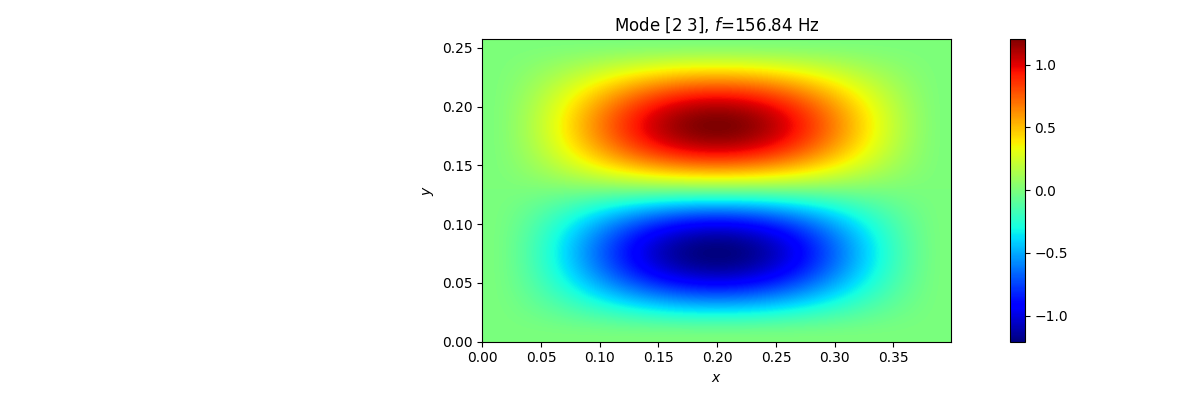

In [30]:
mode = np.array([0,1])

phi_Nx_Ny_Nmx_Nmy = X_Nx_Nmx[:,np.newaxis,:,np.newaxis] * Y_Ny_Nmy[np.newaxis,:,np.newaxis,:]
phi_Nx_Ny_NmB = phi_Nx_Ny_Nmx_Nmy.reshape((Nx,Ny,-1))

fig = plt.figure()
ax1 = fig.add_subplot(111)

img = ax1.imshow(phi_Nx_Ny_Nmx_Nmy[:,:,mode[0],mode[1]].T,
    extent=[x[0], x[-1] , y[0], y[-1]] ,
    cmap="jet" ,
    interpolation = "bilinear",
    # aspect="auto" ,
    origin="lower")

fig.colorbar(img,ax=ax1)
ax1.set_xlabel("$x$")
ax1.set_ylabel(r"$y$")
ax1.set_title(fr"Mode {mode+2}, $f$={f_Nmx_Nmy[mode[0],mode[1]]:.2f} Hz")

fig.tight_layout()

plt.show()

In [34]:
f_NmB = f_Nmx_Nmy.reshape(-1)
p = np.argsort(f_NmB)
f_NmB = f_NmB[p]

clamped_ratio = f_NmB/f_NmB[0]
np.save("clamped_ratio.npy",clamped_ratio)

In [35]:
phi_Nx_Ny_NmB = phi_Nx_Ny_Nmx_Nmy.reshape((Nx,Ny,-1))
phi_Nx_Ny_NmB = phi_Nx_Ny_NmB[:,:,p]

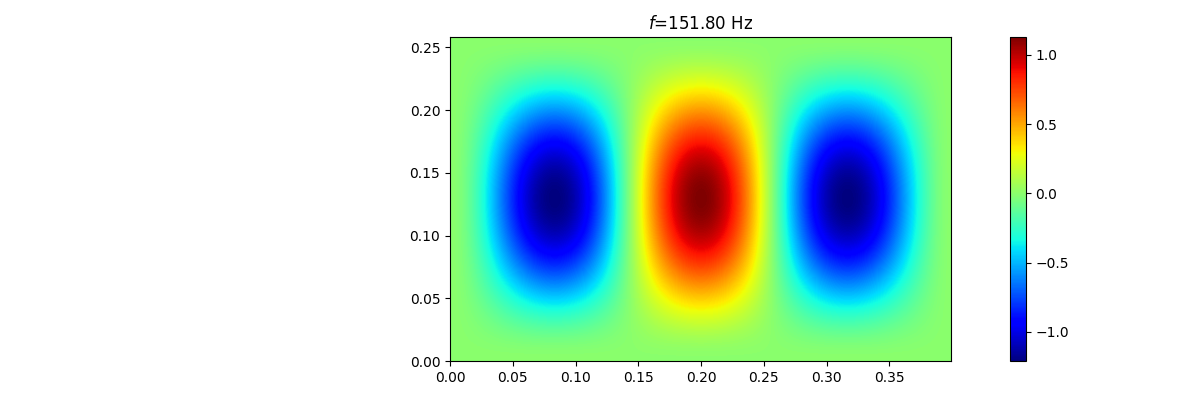

In [43]:
mode = 2

fig = plt.figure()
ax1 = fig.add_subplot(111)

img = ax1.imshow(phi_Nx_Ny_NmB[:,:,mode].T,
    extent=[x[0], x[-1] , y[0], y[-1]] ,
    cmap="jet" ,
    interpolation = "bilinear",
    # aspect="auto" ,
    origin="lower")

fig.colorbar(img,ax=ax1)
ax1.set_xlabel("")
ax1.set_ylabel(r"")
ax1.set_title(fr"$f$={f_NmB[mode]:.2f} Hz")

#bonus
#cmap = cm.get_cmap('viridis', 20)    # 11 discrete colors
#ax1.set_xscale("log")

fig.tight_layout()

plt.show()